## 

按照上图的模式，再绘制一个双尾检验的临界值图。
- alpha = 0.05 时，双尾检验的临界值大约是 ±1.96。
  - 左右两侧的竖线用 black, dash 线，宽度为 1.2。
- 接受域用淡蓝色斜线底纹填充，拒绝域用淡红色填充。

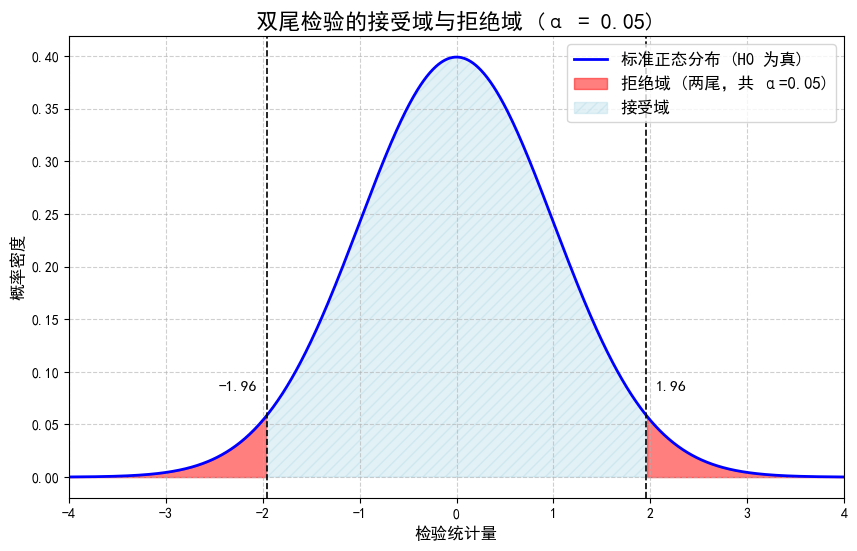

In [5]:
# 双尾检验临界值图（在已有的 x, y, plt, norm 环境下运行）
alpha = 0.05
cv = norm.ppf(1 - alpha / 2)  # ≈ 1.96

fig, ax = plt.subplots(figsize=(10, 6))

# 正态曲线
ax.plot(x, y, 'b-', linewidth=2, label='标准正态分布 (H0 为真)')

# 拒绝域（左右两侧）
x_left = x[x <= -cv]
y_left = norm.pdf(x_left)
x_right = x[x >= cv]
y_right = norm.pdf(x_right)
ax.fill_between(x_left, y_left, color='red', alpha=0.5, label=f'拒绝域 (两尾，共 α={alpha})')
ax.fill_between(x_right, y_right, color='red', alpha=0.5)

# 接受域（中间），使用淡蓝色并添加斜线底纹
x_accept = x[(x > -cv) & (x < cv)]
y_accept = norm.pdf(x_accept)
accept_poly = ax.fill_between(x_accept, y_accept, color='lightblue', alpha=0.35, label='接受域')
# 给返回的 PolyCollection 添加斜线 hatch
try:
    accept_poly.set_hatch('///')
except Exception:
    # 某些 matplotlib 版本对 set_hatch 支持不同，这里忽略错误以保证兼容性
    pass

# 临界值竖线（black, dash, width=1.2）
ax.axvline(-cv, color='black', linestyle='--', linewidth=1.2)
ax.axvline(cv, color='black', linestyle='--', linewidth=1.2)
ax.text(-cv-0.1, 0.08, f'{-cv:.2f}', horizontalalignment='right', verticalalignment='bottom', fontsize=11)
ax.text(cv+0.1, 0.08, f'{cv:.2f}', horizontalalignment='left', verticalalignment='bottom', fontsize=11)

# 美化
ax.set_title('双尾检验的接受域与拒绝域 (α = 0.05)', fontsize=16)
ax.set_xlabel('检验统计量', fontsize=12)
ax.set_ylabel('概率密度', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(x.min(), x.max())
ax.set_xticks(np.arange(-4, 5, 1))

plt.show()

按照上图的模式，重新输出单尾检验的临界值图。
- alpha = 0.05 时，单尾检验的临界值大约是 -1.645。
  - 竖线用 black, dash 线，宽度为 1.2。
- 接受域用淡蓝色斜线底纹填充，拒绝域用淡红色填充。

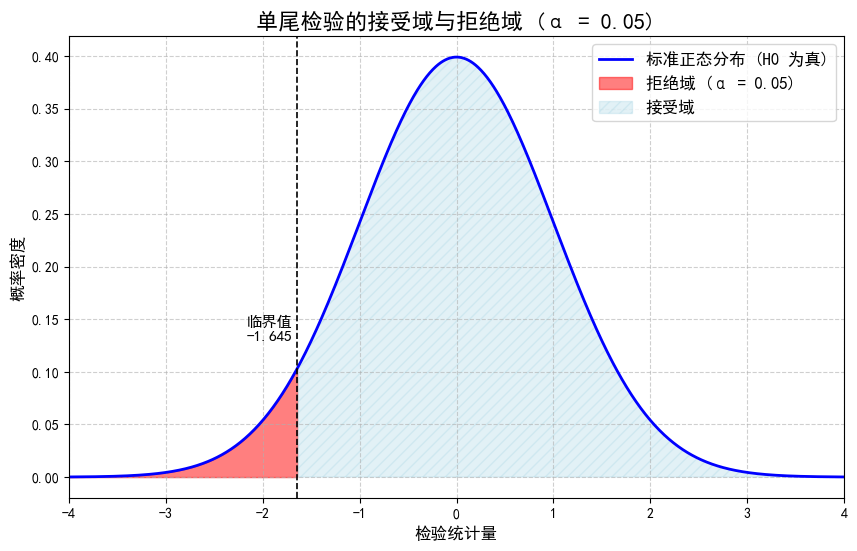

In [8]:
# 单尾检验临界值图（在已有的 x, y, plt, norm 环境下运行）
alpha = 0.05
critical_value = norm.ppf(alpha)  # ≈ -1.645

# 使用已有的 x, y 来分割接受/拒绝区间，避免覆盖已有变量名
x_rej = x[x <= critical_value]
y_rej = norm.pdf(x_rej)
x_acc = x[x > critical_value]
y_acc = norm.pdf(x_acc)

fig, ax = plt.subplots(figsize=(10, 6))

# 正态曲线
ax.plot(x, y, 'b-', linewidth=2, label='标准正态分布 (H0 为真)')

# 拒绝域（左侧）淡红色填充
ax.fill_between(x_rej, y_rej, color='red', alpha=0.5, label=f'拒绝域 (α = {alpha})')

# 接受域（右侧）淡蓝色并添加斜线底纹
accept_poly = ax.fill_between(x_acc, y_acc, color='lightblue', alpha=0.35, label='接受域')
try:
    accept_poly.set_hatch('///')
except Exception:
    pass  # 某些 matplotlib 版本对 set_hatch 支持不同，忽略以保证兼容性

# 临界值竖线（black, dash, width=1.2）
ax.axvline(critical_value, color='black', linestyle='--', linewidth=1.2)
ax.text(critical_value - 0.05, max(y)*0.32, f'临界值\n{critical_value:.3f}',
        horizontalalignment='right', verticalalignment='bottom', fontsize=11)

# 美化
ax.set_title('单尾检验的接受域与拒绝域 (α = 0.05)', fontsize=16)
ax.set_xlabel('检验统计量', fontsize=12)
ax.set_ylabel('概率密度', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(x.min(), x.max())
ax.set_xticks(np.arange(-4, 5, 1))

plt.show()